<a href="https://colab.research.google.com/github/Ekaterinaspbrva/Algorithms/blob/main/%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

предсказать стоимость квартиры в 16 округе,
используя год постройки / продажи как признак,
и применить чистую линейную регрессию.

Подготовка данных

In [ ]:
import numpy as np
import pandas as pd

# Примерные данные: год продажи и цена квартиры
data = {
    'year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'price': [500000, 520000, 540000, 560000, 590000, 600000, 630000, 650000, 670000]
}

df = pd.DataFrame(data)
print(df)

   year   price
0  2015  500000
1  2016  520000
2  2017  540000
3  2018  560000
4  2019  590000
5  2020  600000
6  2021  630000
7  2022  650000
8  2023  670000


 Линейная регрессия


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Признаки (X) и целевая переменная (y)
X = df[['year']]  # скобки двойные -> остаётся таблица
y = df['price']

# Модель
model = LinearRegression()
model.fit(X, y)

# Параметры модели
print(f"Коэффициент (наклон): {model.coef_[0]:.2f}")
print(f"Свободный член (пересечение с осью Y): {model.intercept_:.2f}")

Коэффициент (наклон): 21500.00
Свободный член (пересечение с осью Y): -42824055.56


Предсказание


In [ ]:
year_to_predict = np.array([[2025]])
predicted_price_2025 = model.predict(year_to_predict)[0]


print(f"Прогнозируемая цена квартиры в 2025 году: {predicted_price_2025:,.0f} евро")

Прогнозируемая цена квартиры в 2025 году: 713,444 евро


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4. Визуализация


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


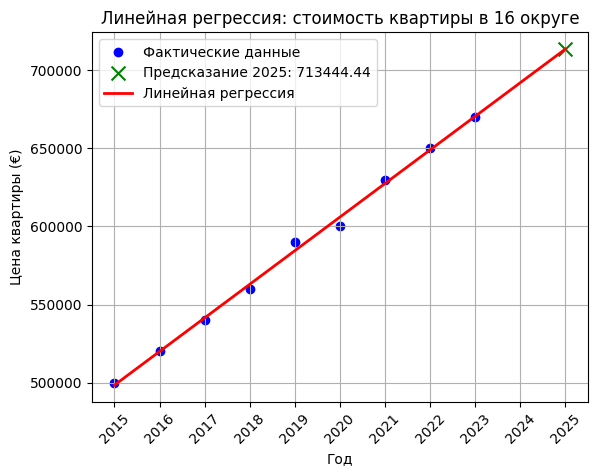

In [ ]:
# Построение графика
years = np.arange(df['year'].min(), 2026).reshape(-1, 1)  # от минимального года до 2025 включительно
plt.scatter(X, y, color='blue', label='Фактические данные')
plt.scatter(2025, predicted_price_2025, color='green', marker='x', s=100, label=f'Предсказание 2025: {predicted_price_2025:.2f}')

plt.plot(years, model.predict(years), color='red', linewidth=2, label='Линейная регрессия')
plt.xticks(ticks=years.flatten(), labels=years.flatten().astype(int), rotation=45)

plt.xlabel('Год')
plt.ylabel('Цена квартиры (€)')
plt.title('Линейная регрессия: стоимость квартиры в 16 округе')
plt.legend()
plt.grid(True)
plt.show()

логистическая регрессия про покупки в Париже  🇫🇷🎀


Сюжет:
Представь: девушка гуляет по Парижу.
Чем больше у неё денег и чем лучше настроение — тем выше шанс, что она что-то купит в бутике.

Мы сделаем логистическую модель, которая будет предсказывать:
Купит что-то — или нет?

(Класс 1 — покупка, класс 0 — нет покупки.)

Что ты получишь на графике:
💖 Фон от светло-розового к насыщенному малиновому:

Светлый ➔ маленький шанс покупки
Яркий ➔ большой шанс покупки

💸 Оси: "Деньги" и "Настроение"
👜 Точки:

Зелёные — девушка НЕ купила ничего
Красные — девушка СДЕЛАЛА покупку

Смысл модели:
Если у девушки много денег И хорошее настроение → почти точно купит! 🛍️💄
Мало денег или плохое настроение → шансы падают.

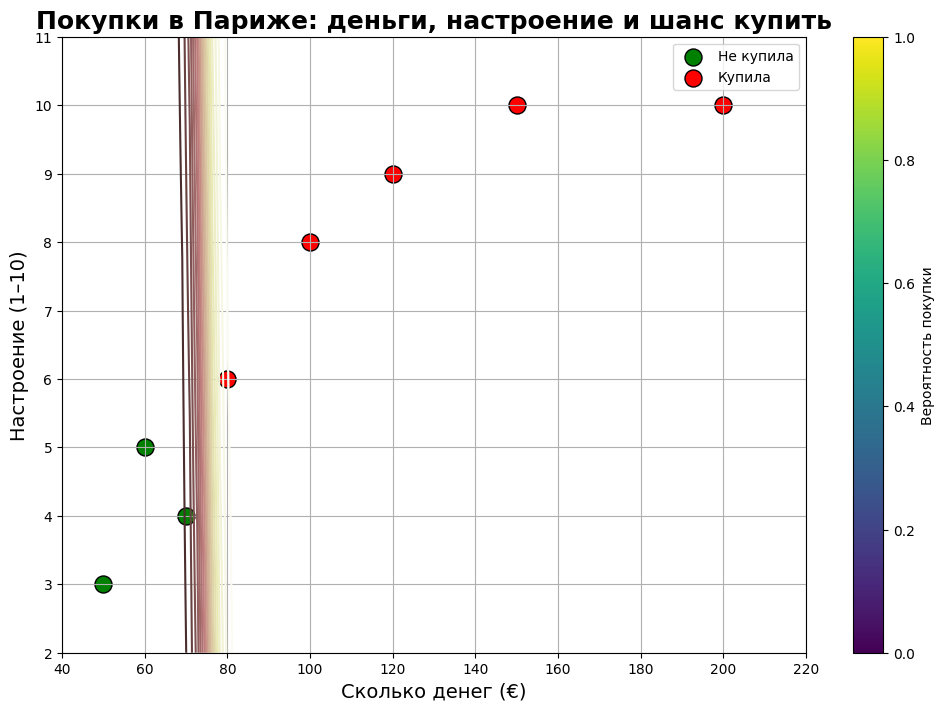

In [ ]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Данные: [сумма денег, настроение]
# Деньги в евро, настроение по шкале от 1 до 10
X = np.array([
    [50, 3], [60, 5], [70, 4], [80, 6],
    [100, 8], [120, 9], [150, 10], [200, 10]
])

# Метки: 0 - не купила, 1 - купила
y = np.array([0, 0, 0, 1, 1, 1, 1, 1])

# Обучаем модель
model = LogisticRegression()
model.fit(X, y)

# Создаём сетку для рисования фона
money_range = np.linspace(40, 220, 100)
mood_range = np.linspace(2, 11, 100)
money_grid, mood_grid = np.meshgrid(money_range, mood_range)
X_test = np.c_[money_grid.ravel(), mood_grid.ravel()]

# Предсказания вероятности
y_proba = model.predict_proba(X_test)[:, 1]
y_proba = y_proba.reshape(money_grid.shape)

# Рисуем
plt.figure(figsize=(12, 8))

# Фон: цвет по вероятности покупки
plt.contour(money_grid, mood_grid, y_proba, levels=20, cmap="pink")

# Исходные точки
for idx, label in enumerate(y):
    color = 'green' if label == 0 else 'red'
    plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolors='black', s=150, label=f'{"Не купила" if label==0 else "Купила"}' if idx in [0,4] else "")

# Подписи
plt.title('Покупки в Париже: деньги, настроение и шанс купить', fontsize=18, fontweight='bold')
plt.xlabel('Сколько денег (€)', fontsize=14)
plt.ylabel('Настроение (1–10)', fontsize=14)
plt.legend()
plt.grid(True)
plt.colorbar(label='Вероятность покупки')
plt.show()


1. Decision Tree (одно дерево)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Примерные данные: X — признаки, y — метки
X = [[0], [1], [2], [3], [4], [5]]
y = [0, 0, 1, 1, 1, 0]  # 0 — солёное, 1 — сладкое

# Создаём дерево
tree = DecisionTreeClassifier()

# Обучаем дерево на данных
tree.fit(X, y)

# Делаем предсказание
print(tree.predict([[2]]))  # Должно быть [1] — сладкое
print(tree.predict([[5]]))  # Должно быть [0] — солёное

[1]
[0]


2. Random Forest (много деревьев)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Те же данные
X = [[0], [1], [2], [3], [4], [5]]
y = [0, 0, 1, 1, 1, 0]

# Создаём лес из 10 деревьев
forest = RandomForestClassifier(n_estimators=10)

# Обучаем лес
forest.fit(X, y)

# Делаем предсказание
print(forest.predict([[2]]))  # [1] — сладкое
print(forest.predict([[5]]))  # [0] — солёное

[1]
[0]


======== SVM (Support Vector Machine)


✅ Что такое iris.data?
iris.data — это таблица с измерениями цветов ириса (цветка), которая входит в стандартный набор данных Iris в scikit-learn.

📦 Состав:
Каждая строка в iris.data — это один цветок, а каждая колонка — одно из его измерений:


Признак	Описание
0 — sepal length (cm)	длина чашелистика
1 — sepal width (cm)	ширина чашелистика
2 — petal length (cm)	длина лепестка
3 — petal width (cm)	ширина лепестка
iris.target — это метки классов: 0, 1 или 2 (виды ириса: Setosa, Versicolor, Virginica).

iris.feature_names — названия колонок.


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.feature_names[:5])
print(iris.data[:5])
print(iris.target[:5])



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Точность на тестовой выборке: 1.00


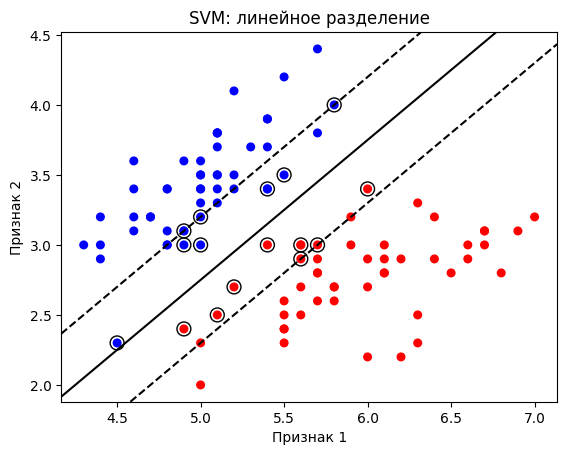

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Загружаем набор данных ирисов
iris = datasets.load_iris()
X = iris.data[:, :2]  # используем только 2 признака для визуализации
y = iris.target

# Оставим только два класса (например, 0 и 1)
X = X[y != 2]
y = y[y != 2]

# Разделим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучаем SVM с линейным ядром
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Предсказание
accuracy = clf.score(X_test, y_test)
print(f"Точность на тестовой выборке: {accuracy:.2f}")

# Визуализация
def plot_svm(clf, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Создаем сетку
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Рисуем границу и margin
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # Рисуем опорные векторы
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel("Признак 1")
    plt.ylabel("Признак 2")
    plt.title("SVM: линейное разделение")
    plt.show()

plot_svm(clf, X, y)

k-means

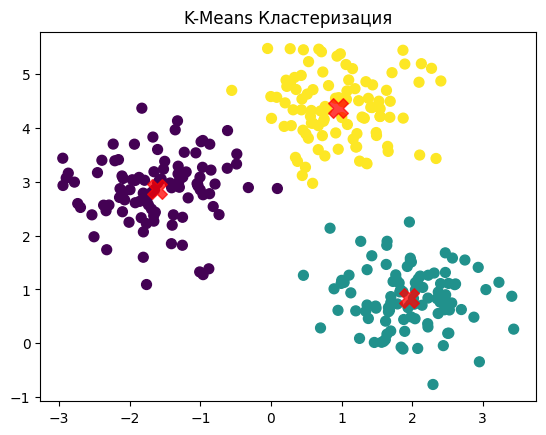

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Создаем искусственные данные с 3 кластерами
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

# Обучаем KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Предсказание кластеров
y_kmeans = kmeans.predict(X)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X')  # центры
plt.title("K-Means Кластеризация")
plt.show()


pip install umap-learn

In [ ]:
pip install umap-learn

До PCA:
Размерность: (150, 4)
Признаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

После PCA:
Размерность: (150, 2)
Компоненты: ['PC1', 'PC2']


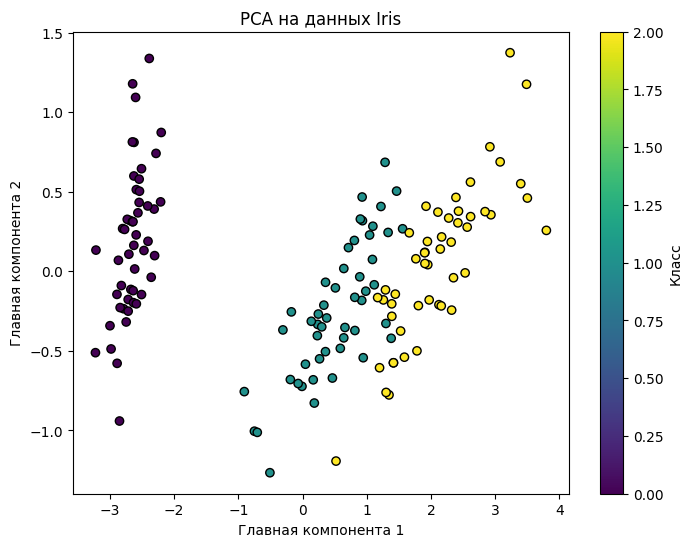

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные
iris = load_iris()
X = iris.data
y = iris.target

# Размерность и названия признаков до PCA
print("До PCA:")
print(f"Размерность: {X.shape}")
print(f"Признаки: {iris.feature_names}")

# PCA: сжимаем до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Размерность и названия компонент после PCA
print("\nПосле PCA:")
print(f"Размерность: {X_pca.shape}")
print(f"Компоненты: ['PC1', 'PC2']")

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA на данных Iris')
plt.colorbar(label='Класс')
plt.show()


t-sns

До t-SNE:
Размерность: (150, 4)
Признаки: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

После t-SNE:
Размерность: (150, 2)
Новые признаки: ['Dim 1', 'Dim 2']


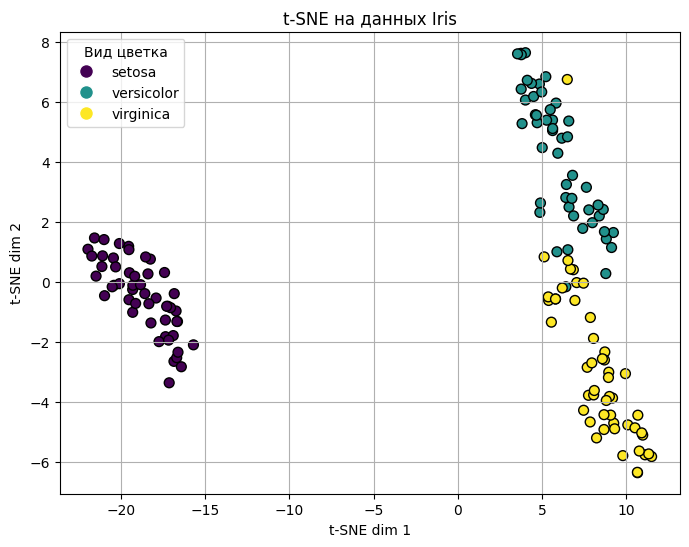

In [ ]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = list(iris.target_names)  # <--- Преобразуем в список
feature_names = iris.feature_names

# Вывод размерности и заголовков ДО
print("До t-SNE:")
print("Размерность:", X.shape)
print("Признаки:", feature_names)

# Применяем t-SNE с max_iter
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', max_iter=500, random_state=42)
X_tsne = tsne.fit_transform(X)

# Вывод размерности и заголовков ПОСЛЕ
print("\nПосле t-SNE:")
print("Размерность:", X_tsne.shape)
print("Новые признаки: ['Dim 1', 'Dim 2']")

# Создаём таблицу результатов
df = pd.DataFrame(X_tsne, columns=['Dim 1', 'Dim 2'])
df['Цветок'] = [target_names[i] for i in y]

# Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Dim 1'], df['Dim 2'], c=y, cmap='viridis', s=50, edgecolor='k')
plt.title('t-SNE на данных Iris')
plt.xlabel('t-SNE dim 1')
plt.ylabel('t-SNE dim 2')
plt.grid(True)

# Легенда
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                            markerfacecolor=plt.cm.viridis(i / 2), markersize=10)
                 for i, label in enumerate(target_names)]
plt.legend(handles=legend_labels, title='Вид цветка')
plt.show()
